In [1]:
# loading in the stage 5 network
import pandas as pd
from ast import literal_eval
s3_network_df = pd.read_csv("data/Stage_3_PPI_predicted_features_with_clusters1.csv")

In [2]:
# Cleaning up Cluster data

# proteins which aren't in any clusters have an empty list, represented as na
print("number of na values for protein 1 clusters: ", sum(s3_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s3_network_df["Protein_2_clusters"].isna()))

na_p1_clusters = s3_network_df["Protein_1_clusters"].isna()
na_p2_clusters = s3_network_df["Protein_2_clusters"].isna()

# to clean these up, we assign empty lists to all clusters where there is an na value
s3_network_df.loc[na_p1_clusters, "Protein_1_clusters"] = pd.Series([[]] * na_p1_clusters.sum()).values
s3_network_df.loc[na_p2_clusters, "Protein_2_clusters"] = pd.Series([[]] * na_p2_clusters.sum()).values

# Verification that there are no more na values left
assert(sum(s3_network_df["Protein_1_clusters"].isna()) == 0)
assert(sum(s3_network_df["Protein_2_clusters"].isna()) == 0) 


# Function to convert string data to list represantations
def convert_data(row):
    data = row
    if type(data) == str:
        return literal_eval(data)
    else:
        return data
    
# Converting protein lists from strings to list representation
s3_network_df.loc[:, "Protein_1_clusters"] = s3_network_df.loc[:,"Protein_1_clusters"].apply(convert_data)
s3_network_df.loc[:, "Protein_2_clusters"] = s3_network_df.loc[:,"Protein_2_clusters"].apply(convert_data)

# Write out our network
s3_network_df.to_csv("data/network/stage_5_3D7.tsv", sep="\t")

print("number of na values for protein 1 clusters: ", sum(s3_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s3_network_df["Protein_2_clusters"].isna()))

number of na values for protein 1 clusters:  6
number of na values for protein 2 clusters:  9
number of na values for protein 1 clusters:  0
number of na values for protein 2 clusters:  0


In [3]:
# Graph analysis

# node properties: index, Protein1, Protein2, Description1, Descrption2
# edge properties: Score (begtween Protein1 and Protein2)
import networkx as nx
# want to import each interaction as an edge into the graph
G = nx.Graph()
G.add_weighted_edges_from(list(s3_network_df[["Protein1", "Protein2", "Score"]].itertuples(index=False)))
print(G)

# to get degree
print("Degree of A0A5K1K7U1 is ", G.degree["A0A5K1K7U1"])

# write out graph
nx.write_graphml(G, "data/network/stage5_graph.graphml")

Graph with 157 nodes and 556 edges
Degree of A0A5K1K7U1 is  11


In [4]:
G.nodes

NodeView(('A0A5K1K7U1', 'O77396', 'Q8I0P6', 'Q8IFP3', 'Q8IEU2', 'Q8IKC8', 'Q8I2X4', 'Q8II43', 'O97285', 'Q8IKF0', 'Q8I484', 'Q8I485', 'C6KST3', 'Q6ZMA8', 'Q8IEK1', 'Q8IJW0', 'O97227', 'Q8I0X1', 'C6KT18', 'Q8I5H4', 'Q8IDG2', 'C0H4V6', 'Q7KQL9', 'Q8IC05', 'Q8IDN6', 'Q7KQL5', 'Q8IET7', 'Q76NN6', 'Q8ILI6', 'Q8IDZ8', 'Q8II61', 'C0H5H0', 'Q8I0U7', 'Q8IC01', 'Q8I608', 'Q8IKK7', 'Q8IJN9', 'Q8I280', 'C0H571', 'Q8IJT1', 'O96153', 'Q8I1V1', 'Q8I261', 'P61074', 'Q76NM6', 'K7NTP5', 'Q8IJN7', 'Q8I0V4', 'Q8ILB6', 'Q8IK90', 'C6KTA4', 'Q8II36', 'Q8IJ34', 'C6KT34', 'Q8IBI3', 'C6KSV0', 'Q8I395', 'Q8IBN4', 'Q8IEC8', 'Q8IKR1', 'Q8I2W3', 'Q8IM55', 'Q8I2H3', 'Q8I2W2', 'O97247', 'O96252', 'Q8IKJ0', 'Q8I0V2', 'Q7K6A9', 'C0H4Y6', 'Q8I2V9', 'Q76NN8', 'Q8IAR3', 'Q8ILV6', 'Q8I289', 'Q8IB24', 'Q8IIV1', 'Q8I2J3', 'Q8I3N3', 'Q8IKI8', 'O77389', 'Q8IAX8', 'Q8IIV2', 'A0A5K1K8H7', 'Q8IHR8', 'O96127', 'Q8I492', 'Q8IIJ8', 'Q8IES0', 'Q8I6S5', 'Q8IEA6', 'A0A143ZY58', 'Q76NM3', 'A0A5K1K7X4', 'Q8IIF0', 'Q8IB03', 'Q8II24', 'Q8I

In [5]:
# get interacting pairs and their score
s3_network_df[["Protein1", "Protein2", "Score"]]

,Protein1,Protein2,Score
0,A0A5K1K7U1,O77396,0.999633
1,Q8I0P6,Q8IFP3,0.913919
2,Q8IEU2,Q8IKC8,0.579923
3,Q8I2X4,Q8II43,0.850110
4,O97285,Q8IKF0,0.584808
...,...,...,...
551,Q8I0V4,Q8IC05,0.676507
552,O77396,Q7K6A9,0.933122
553,C6KSV0,Q8IIV2,0.719885
554,A0A143ZY58,K7NTP5,0.603809


In [6]:
# get neighbours for node by name
list(G.neighbors("A0A5K1K7U1"))

['O77396',
 'Q8IDG2',
 'Q8I261',
 'Q8IK90',
 'Q8IDG3',
 'Q8IAR3',
 'Q8IJT1',
 'Q8IBI3',
 'Q8I0U7',
 'C6KST3',
 'Q7K6A9']

In [7]:
# Create a metadata df of network stats per gene
dict = {}
nodes = list(G.nodes)
degrees = []
for node in nodes:
    degrees.append(G.degree[node])
neighbours = []
for node in nodes:
    neighbours.append(list(G.neighbors(node)))
network_df = pd.DataFrame()
network_df.insert(0, "Accession ID", nodes)
network_df.insert(1, "Degree", degrees)
network_df.insert(2, "Neighbours", neighbours)

In [8]:
network_df

,Accession ID,Degree,Neighbours
0,A0A5K1K7U1,11,"[O77396, Q8IDG2, Q8I261, Q8IK90, Q8IDG3, Q8IAR..."
1,O77396,16,"[A0A5K1K7U1, Q8IJN9, Q8IDG2, Q8I261, Q8IK90, Q..."
2,Q8I0P6,23,"[Q8IFP3, Q8IJW0, Q8IET7, A0A143ZY58, O96252, Q..."
3,Q8IFP3,18,"[Q8I0P6, Q8IKK7, Q8I1V1, Q8IEC8, Q8IKR1, Q8IKF..."
4,Q8IEU2,4,"[Q8IKC8, Q8I395, C0H571, O77310]"
...,...,...,...
152,Q8I206,1,[Q8IFM0]
153,Q8IIV8,1,[Q8IET7]
154,A0A143ZX41,1,[Q7KWJ2]
155,Q7KWJ2,1,[A0A143ZX41]


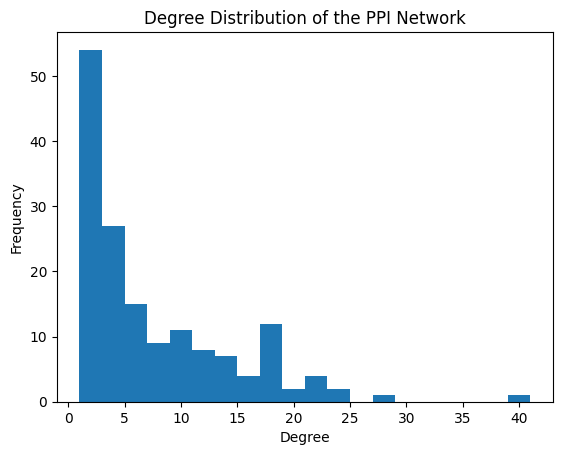

In [9]:
# Degree distributions
import matplotlib.pyplot as plt

# Get degree of all nodes (proteins)
degrees = [G.degree(n) for n in G.nodes()]

# Plot degree distribution
plt.hist(degrees, bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of the PPI Network')
plt.show()

In [10]:
# Calculate centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, 300)

print("Top Proteins by Degree Centrality:", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Betweenness Centrality:", sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Closeness Centrality:", sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10])
print("Top Proteins by Eigenvector Centrality:", sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10])

Top Proteins by Degree Centrality: [('K7NTP5', 0.26282051282051283), ('Q8I0V2', 0.17307692307692307), ('Q8IB24', 0.15384615384615385), ('Q8I0P6', 0.14743589743589744), ('Q8I2X4', 0.1346153846153846), ('C0H4V6', 0.1346153846153846), ('Q8IC01', 0.1346153846153846), ('O96252', 0.1346153846153846), ('Q8IK90', 0.12179487179487179), ('C6KSV0', 0.12179487179487179)]
Top Proteins by Betweenness Centrality: [('K7NTP5', 0.12262770041645586), ('C0H4V6', 0.0868942943770356), ('Q8II24', 0.08258381586902473), ('C6KSV0', 0.05921038358077161), ('Q8IC01', 0.05758387695901858), ('Q8IB24', 0.05717871091637528), ('Q8IKK7', 0.0468410451076924), ('Q8I0V2', 0.04359489715176183), ('Q8I2X4', 0.03977604756584811), ('Q8IBV7', 0.038137295317916)]
Top Proteins by Closeness Centrality: [('K7NTP5', 0.3737153534724385), ('C0H4V6', 0.34833091436865027), ('Q8IB24', 0.3470213996529786), ('Q8I0V2', 0.3393665158371041), ('Q8IKF0', 0.33444816053511706), ('Q8IKK7', 0.3332407664537629), ('Q8II24', 0.3320420586607637), ('Q8IF

In [11]:
network_df.insert(3, "Degree Centrality", degree_centrality.values()) # note: degree centrality calculated with 
network_df.insert(4, "Betweenness Centrality", betweenness_centrality.values())
network_df.insert(5, "Closeness Centrality", closeness_centrality.values())
network_df.insert(6, "Eigenvector Centrality", eigenvector_centrality.values())


In [12]:
# to display by ordering of column
network_df.sort_values(by="Betweenness Centrality", ascending=False, inplace=False)

,Accession ID,Degree,Neighbours,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
45,K7NTP5,41,"[Q8IJN7, C6KSV0, Q76NN8, Q8IB24, Q8IES0, C6KTA...",0.262821,0.122628,0.373715,2.606598e-01
21,C0H4V6,21,"[Q7KQL9, P61074, Q8I0V4, Q8IJN7, Q8II24, Q8IB2...",0.134615,0.086894,0.348331,1.089838e-01
96,Q8II24,14,"[C0H4V6, Q8IKK7, Q8IKF0, O97227, Q8I2X4, Q8ILT...",0.089744,0.082584,0.332042,7.019797e-02
55,C6KSV0,19,"[K7NTP5, C6KT18, Q8IJ34, Q8IIV1, Q8ILG8, Q8IBV...",0.121795,0.059210,0.313972,1.241235e-01
33,Q8IC01,21,"[Q6ZMA8, Q8IDG2, Q8IK90, Q8I2J3, Q8IDG3, Q8II3...",0.134615,0.057584,0.292113,1.545886e-01
...,...,...,...,...,...,...,...
115,Q8I3W9,2,"[Q76NM4, A0A5K1K8H7]",0.012821,0.000000,0.014423,1.534407e-164
117,Q8ILJ9,1,[O96252],0.006410,0.000000,0.224048,1.160652e-02
119,Q8IL75,1,[Q8I2I2],0.006410,0.000000,0.163088,7.085192e-04
121,Q8IBD1,1,[K7NTP5],0.006410,0.000000,0.252207,1.754174e-02


In [13]:
# integrate additional info 

# break down degree by essential vs dispensable proteins, get from piggyback transposon or plasmoDB, hyperLopit 
# predicted compartment, calculate average degree of essential proteins vs nonessential proteins
# subcellular localization from hyperlopit dataset, can use plasmodb, same for essential proteins vs nonessential proteins

In [14]:
# Clustering coefficient (measures protein local connectivity)
clustering_coeffs = nx.clustering(G)
average_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering}")

# Community detection using Girvan-Newman
from networkx.algorithms.community import girvan_newman

communities = girvan_newman(G)
first_community = next(communities)
print(f"First Community Split: {first_community}")

Average Clustering Coefficient: 0.46281316617442225
First Community Split: ({'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5K1K7U1', 'Q8IJT1', 'Q8IC01', 'Q8II36', 'O77396', 'Q8IE84', 'Q8IKJ0', 'Q8I280', 'Q8IDG2', 'Q8IBI3', 'Q7K6A5', 'Q6ZMA8', 'O97227', 'O77389', 'C0H5H0', 'Q8IK90', 'Q8IEK1', 'C6KST3', 'Q8I2X4', 'Q8II43', 'Q76NM6', 'Q8IDG3', 'Q8I5I0', 'Q8IAR3', 'Q8I2J3', 'Q8IJN9', 'Q8I2H3'}, {'Q8I5H4', 'Q8IM01', 'Q8IJN7', 'C6KTA4', 'Q8I2W2', 'Q8ILA1', 'Q8IKF0', 'Q8I5B6', 'Q8IJW0', 'Q8IB24', 'O97285', 'Q8IJX3', 'Q8I3N3', 'K7NTP5', 'Q8IEJ6', 'Q8I5A9', 'Q8IFP3', 'Q8I289', 'Q8IKK7', 'Q8II73', 'C0H4D2', 'Q8IEC8', 'Q7KQL5', 'Q7KQM0', 'Q8ILT0', 'Q8I0V4', 'Q8IK89', 'Q76NM3', 'C6KT50', 'Q8I3M5', 'Q8I5L6', 'Q8IJ34', 'Q8IBD1', 'P61074', 'Q8IIV8', 'Q8IKG9', 'C6KTB3', 'O96153', 'C6KT18', 'Q8IJX8', 'O96252', 'Q8I6S5', 'A0A143ZY58', 'C0H4V6', 'Q8I0V2', 'Q8ILB6', 'Q7KQL9', 'Q8ILI6', 'A0A143ZZK9', 'Q8IEA6', 'Q76NN8', 'C0H4Y6', 'Q8I2V9', 'Q8I0X1', 'C6KSX4', 'Q8IBV7', 'Q8I1V1', 'Q8IL75', 'Q8ILJ9', 'Q8IIJ8',

In [15]:
def manual_closeness_centrality(G, node):
    # Step 1: Get the total number of nodes
    N = len(G.nodes)
    
    # Step 2: Compute the shortest path distances from the given node to all other nodes
    shortest_paths = nx.shortest_path_length(G, source=node)
    
    # Step 3: Sum the shortest path distances
    total_shortest_path_length = sum(shortest_paths.values())
    
    # Step 4: Use the formula to compute closeness centrality
    if total_shortest_path_length > 0 and N > 1:
        closeness_centrality = (N - 1) / total_shortest_path_length
    else:
        # In case the graph is disconnected, return 0
        closeness_centrality = 0
    
    return closeness_centrality
manual_closeness_centrality(G, "K7NTP5")

0.631578947368421

In [16]:
essentiality_df = pd.read_csv("data/falciparum_3D7+knowlesi.tsv", delimiter='\t')
c = essentiality_df.columns
essentiality_df.columns
renamed_columns = {'P.falciparum 3D7 piggyBac insertion mutagenesis - mutant fitness score': '3D7_MFS',
                                'P.falciparum 3D7 piggyBac insertion mutagenesis - mutagenesis index score': '3D7_MIS',
                                'P.knowlesi strain AIHI piggyBac mutagenesis - MIS score': 'AIHI_MIS',
                                'P.knowlesi strain AIHI piggyBac mutagenesis - MFS score': 'AIHI_MFS'
                                }
essentiality_df.rename(columns=renamed_columns, inplace=True)
essentiality_df.columns

Index(['Gene ID', 'source_id', 'Organism', 'Genomic Location (Gene)',
       'Product Description', '3D7_MFS', '3D7_MIS', 'SignalP Peptide',
       '# TM Domains',
       'P.knowlesi strain H piggyBac mutagenesis - Occupancy index score',
       'P.knowlesi strain H piggyBac mutagenesis - Hybrid model score',
       'P.knowlesi strain AIHI piggyBac mutagenesis - mutability', 'AIHI_MIS',
       'P.knowlesi strain AIHI piggyBac mutagenesis - MIS plus score',
       'AIHI_MFS'],
      dtype='object')

In [17]:
# drop all columns that have all values as na (which happened to be all knowlesi scores)
essentiality_df.dropna(axis=1, how='all', inplace=True)
# essentiality_df.dropna(subset=['3D7_MFS', '3D7_MIS'])

In [18]:
essentiality_df.count(0)

Gene ID                    5791
source_id                  5791
Organism                   5791
Genomic Location (Gene)    5791
Product Description        5791
3D7_MFS                    5456
3D7_MIS                    5456
SignalP Peptide             609
# TM Domains               5389
dtype: int64

In [19]:
essentiality_df['essential'] = essentiality_df["3D7_MIS"] < 0.25

In [20]:
# sort the df by MIS value
essentiality_df.sort_values(['3D7_MIS'], inplace=True)

In [21]:
# read in plasmoDB gene IDs mapped to Accessions
temp = pd.read_csv("data/GenesByTaxon_Alias.csv")
# Merge dataframes
temp = essentiality_df.merge(temp, on=["Gene ID"])
temp = temp.merge(network_df, left_on=["Name/ID/Alias"], right_on=["Accession ID"])
# Drop unneeded columns
temp.drop(["Organism", "Type", "Source", "Name/ID/Alias", "SignalP Peptide", "# TM Domains"], axis=1, inplace=True)
# drop duplicates
temp.drop_duplicates(["Accession ID"], inplace=True)

In [22]:
essential_mean_degree = temp[temp["essential"]]["Degree"].mean()
nonessential_mean_degree = temp[temp["essential"] == False]["Degree"].mean()
print(essential_mean_degree)
print(nonessential_mean_degree)

7.802469135802469
6.315789473684211


In [23]:
# get the values where essential is true
temp[temp["essential"]].head()

,Gene ID,source_id,Genomic Location (Gene),Product Description,3D7_MFS,3D7_MIS,essential,Accession ID,Degree,Neighbours,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
0,PF3D7_0608500,PF3D7_0608500.1,"Pf3D7_06_v3:350,697..353,774(-)","proteasome subunit alpha type-2, putative",-3.100,0.119,True,C6KST3,18,"[Q6ZMA8, Q8I0U7, Q8II43, Q8I2X4, C6KT34, Q7K6A...",0.115385,0.002969,0.234283,1.701033e-01
1,PF3D7_1464700,PF3D7_1464700.1,"Pf3D7_14_v3:2,624,850..2,627,233(-)","ATP synthase (C/AC39) subunit, putative",-3.121,0.119,True,Q8IKJ0,5,"[Q8I2X4, O96252, Q6ZMA8, K7NTP5, Q76NM6]",0.032051,0.027947,0.311850,5.366127e-02
2,PF3D7_0929400,PF3D7_0929400.1,"Pf3D7_09_v3:1,173,579..1,181,380(+)",high molecular weight rhoptry protein 2,-3.010,0.119,True,C0H571,7,"[Q8IKC8, O77310, Q8I395, Q8IBN4, Q8ILZ1, Q8IEU...",0.044872,0.000554,0.049310,9.682290e-94
3,PF3D7_1116800,PF3D7_1116800.1,"Pf3D7_11_v3:635,806..641,374(-)",heat shock protein 101,-3.014,0.119,True,Q8IIJ8,9,"[Q8IB24, Q8IB03, O96252, Q8ILA1, K7NTP5, Q8I0V...",0.057692,0.004823,0.282287,9.463424e-02
4,PF3D7_1211900,PF3D7_1211900.1,"Pf3D7_12_v3:527,829..533,965(-)",non-SERCA-type Ca2+ -transporting P-ATPase,-3.089,0.119,True,A0A143ZZK9,1,[Q8IB24],0.006410,0.000000,0.239760,1.009305e-02


In [24]:
# determining significance of mean values
import numpy as np
import scipy.stats as stats
np.var(temp[temp["essential"]]["Degree"])
# ttest between degrees of essential and nonessential proteins 
stats.ttest_ind(temp[temp["essential"]]["Degree"], temp[temp["essential"] == False]["Degree"])
# stats.ttest_ind(temp[temp["essential"]]["Betweenness Centrality"], temp[temp["essential"] == False]["Betweenness Centrality"])

TtestResult(statistic=np.float64(1.3534249260650673), pvalue=np.float64(0.17789037258523682), df=np.float64(155.0))

In [25]:
# normalized degree data
temp["Degree_norm"] = (temp["Degree"] - temp["Degree"].mean()) / (temp["Degree"].max() - temp["Degree"].min())

In [26]:
# get degree of nonessential values
temp[temp["essential"] == False]["Degree"]
# get variance of nonessential values
np.var(temp[temp["essential"] == False]["Degree"])

np.float64(49.50554016620498)

In [27]:
# determining significance of mean values
import numpy as np
import scipy.stats as stats
np.var(temp[temp["essential"]]["Degree"])
# ttest between degrees of essential and nonessential proteins 
stats.ttest_ind(temp[temp["essential"]]["Degree"], temp[temp["essential"] == False]["Degree"], equal_var=False)
# stats.ttest_ind(temp[temp["essential"]]["Betweenness Centrality"], temp[temp["essential"] == False]["Betweenness Centrality"])
essential_degrees = temp[temp["essential"]]["Degree"]
nonessential_degrees = temp[temp["essential"] == False]["Degree"]

In [28]:
# reorder columns and save csv
temp.loc[:, ["Accession ID", "Gene ID", "Product Description", "Neighbours", 
             "essential", "Degree", "Betweenness Centrality", 
             "Closeness Centrality"]].to_csv("data/generated_tables/s3_essentiality_df.tsv", sep="\t")

In [29]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")
welch_dof(essential_degrees, nonessential_degrees)

Welch-Satterthwaite Degrees of Freedom = 152.7145


In [30]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(essential_degrees, nonessential_degrees)


 Welch's t-test= 1.3509 
 p-value = 0.1787 
 Welch-Satterthwaite Degrees of Freedom= 152.7145


## Correlation Analysis

In [31]:
# TODO: Download data for different 3D7 models in different stages of life cycle
    
# TODO: Calculate Spearman and Pearson correlation coefficients across interacting pairs
# we get the pairs of interacting genes from our current model

# TODO: Merge these into one so that a primary key is a pair of interacting genes and we have correlation
# coefficients across the different models

# TODO: Calculate correlation coefficients for non-interacting pairs

In [32]:
# function to add uniprot accessions to rnaseq dataframes
def append_uniprot_alias(rnaseq_file, alias_file: str="data/GenesByTaxon_Alias.csv") -> pd.DataFrame:
    """
    supply rnaseq file path and alias file path
    returns dataframe of the rnaseq file with accession id appended
    """
    aliases = pd.read_csv(alias_file)
    df = pd.read_csv(rnaseq_file, delimiter='\t')
    # merge on common column Gene ID
    df = df.merge(aliases, on="Gene ID")
    # take inner join of df and network_df to get aliases only found in network_df
    df = df.merge(network_df["Accession ID"], left_on=["Name/ID/Alias"], right_on=["Accession ID"])
    df.drop(["Type", "Source", "Name/ID/Alias", "Gene ID", "source_id"], axis=1, inplace=True)
    return df

In [33]:
gametocyte_df = append_uniprot_alias("data/rnaseq/3D7 Gametocyte Transcriptomes.tsv")

In [34]:
# erythrocyte_df = append_uniprot_alias("data/rnaseq/falciparum_erythrocitic_rnaseq.tsv")
erythrocyte_df = append_uniprot_alias("data/rnaseq/3D7_postinvasion_erythrocyte.tsv")

In [35]:
interaction_pairs = s3_network_df[["Protein1", "Protein2"]]

In [36]:
from scipy.stats import spearmanr
def compute_spearman(df: pd.DataFrame, protein1: str, protein2: str) -> int:
    # get all except for last column
    try:
        rnaseq1 = list(df[df["Accession ID"] == protein1].iloc[:,:-1].values[0])
        rnaseq2 = list(df[df["Accession ID"] == protein2].iloc[:,:-1].values[0])
        result = spearmanr(rnaseq1, rnaseq2)
        return result
    except:
        print(protein1)
        print(protein2)
    
    
    

def compute_row_spearman(row, df): 
    """
    Wrapper function to compute spearman across a df row.
    Assumes there is protein1 and protein2 columns in dataframe.
    """
    protein1 = row["Protein1"]
    protein2 = row["Protein2"]
    return compute_spearman(df, protein1, protein2)[0]



In [37]:
tmp = erythrocyte_df.drop("Accession ID", axis=1).values[0]
erythrocyte_df[erythrocyte_df["Accession ID"] == "C0H4A6"]

,sense - 2-10 hours post-invasion,sense - 40-5 hours post-invasion,sense - 7-15 hours post-invasion,sense - 12-20 hours post-invasion,sense - 17-25 hours post-invasion,sense - 22-30 hours post-invasion,sense - 27-35 hours post-invasion,sense - 32-40 hours post-invasion,Accession ID


In [38]:
from scipy.stats import pearsonr
def compute_pearson(df: pd.DataFrame, protein1: str, protein2: str) -> int:
    # get all except for last column
    rnaseq1 = list(df[df["Accession ID"] == protein1].iloc[:,:-1].values[0])
    rnaseq2 = list(df[df["Accession ID"] == protein2].iloc[:,:-1].values[0])
    return pearsonr(rnaseq1, rnaseq2)

def compute_row_pearson(row, df, pvalue_flag=False): 
    """
    Wrapper function to compute spearman across a df row.
    Assumes there is protein1 and protein2 columns in dataframe.
    """
    protein1 = row["Protein1"]
    protein2 = row["Protein2"]
    return compute_pearson(df, protein1, protein2)[pvalue_flag]

In [39]:
erythrocyte_df[erythrocyte_df["Accession ID"] == "Q8IBG1"]

,sense - 2-10 hours post-invasion,sense - 40-5 hours post-invasion,sense - 7-15 hours post-invasion,sense - 12-20 hours post-invasion,sense - 17-25 hours post-invasion,sense - 22-30 hours post-invasion,sense - 27-35 hours post-invasion,sense - 32-40 hours post-invasion,Accession ID


In [40]:
# generate a df to keep track of correlation values across datasets
pairs_correlation_df = pd.DataFrame(interaction_pairs)
pairs_correlation_df["spearman_erythrocyte"] = pairs_correlation_df.apply(compute_row_spearman, args=(erythrocyte_df,), axis=1)
pairs_correlation_df.head(5)

,Protein1,Protein2,spearman_erythrocyte
0,A0A5K1K7U1,O77396,1.000000
1,Q8I0P6,Q8IFP3,-0.523810
2,Q8IEU2,Q8IKC8,0.000000
3,Q8I2X4,Q8II43,0.261905
4,O97285,Q8IKF0,-0.166667


In [41]:
s3_network_df.head()

,index,Protein1,Protein2,Score,Description1,Description2,Protein_1_clusters,Protein_2_clusters,Any Matching Go-Terms?,Train/Val/Test,Experimental P. Falciparum,P. Falciparum,P. Knowlesi,P. Berghei,P. Vivax,P. Yoelii,C. parvum,B. bovis
0,0,A0A5K1K7U1,O77396,0.999633,Proteasome subunit beta,"Proteasome subunit alpha type-3, putative","[1, 6]","[1, 6]",1,1,1,1,1,1,1,1,1,1
1,1,Q8I0P6,Q8IFP3,0.913919,Elongation factor 1-alpha,Tubulin alpha chain,"[0, 2, 18]","[2, 18]",1,0,0,0,0,0,0,0,1,0
2,2,Q8IEU2,Q8IKC8,0.579923,Gamete antigen 27/25,Exported protein 2,[7],[7],0,0,0,0,0,0,0,0,0,0
3,3,Q8I2X4,Q8II43,0.850110,Heat shock protein 70,T-complex protein 1 subunit alpha,"[1, 6, 16, 28]","[1, 6]",1,0,0,1,1,1,1,1,1,1
4,4,O97285,Q8IKF0,0.584808,ATP-dependent RNA helicase DDX6,RNA helicase,"[0, 2, 18, 24]","[0, 2, 10, 18, 24]",1,0,0,0,0,0,0,0,0,0


In [42]:
pairs_correlation_df.head()

,Protein1,Protein2,spearman_erythrocyte
0,A0A5K1K7U1,O77396,1.000000
1,Q8I0P6,Q8IFP3,-0.523810
2,Q8IEU2,Q8IKC8,0.000000
3,Q8I2X4,Q8II43,0.261905
4,O97285,Q8IKF0,-0.166667


In [43]:
# function to graph spearman correlation curve
import numpy as np
import seaborn as sns
def plot_spearman(df, col_name):
    data = df[col_name]
    sns.set_style('whitegrid')
    sns.kdeplot(np.array(data), bw=0.5)

In [44]:
# Make all combinations of pairs of proteins in network
from itertools import combinations
# get unique genes from our network (each gene is a node)
unique_genes = set(G.nodes)
all_pairs = combinations(unique_genes, 2)
combos = set()
for combo in all_pairs:
    combos.add(combo)
    
# Create a dataframe of all non-interacting pairs of proteins
pairs = []
pairs.extend(interaction_pairs.apply(lambda row: (row['Protein1'], row['Protein2']), axis=1).to_list())
pairs.extend(interaction_pairs.apply(lambda row: (row['Protein2'], row['Protein1']), axis=1).to_list())
nonpairs = combos.difference(set(pairs))
nonpairs_correlation_df = pd.DataFrame(nonpairs, columns=["Protein1", "Protein2"])

In [45]:
allpairs_correlation_df = pd.DataFrame(combos, columns=["Protein1", "Protein2"])

In [46]:
tmp_df = ""
def compute_df(file_path: str, df: pd.DataFrame, col_name: str):
    tmp_df = append_uniprot_alias(file_path)
    df[col_name] = df.apply(compute_row_spearman, args=[tmp_df], axis=1)

In [47]:
# Spearman calculations for all interacting and non-interacting pairs
# 7 stages dataset
print("assessing 7 stages dataset...")
seven_stages_df = append_uniprot_alias("data/rnaseq/3D7_7stages.tsv")
pairs_correlation_df["7_stages"] = pairs_correlation_df.apply(compute_row_spearman, args=[seven_stages_df], axis=1)
nonpairs_correlation_df["7_stages"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[seven_stages_df], axis=1)

# intraerythrocitic
print("assessing intraerythrocitic dataset...")
intra_df = append_uniprot_alias("data/rnaseq/3D7_intraerythrocytic_dev.txt")
pairs_correlation_df["intraerythrocyte_cycle"] = pairs_correlation_df.apply(compute_row_spearman, args=[intra_df], axis=1)
nonpairs_correlation_df["intraerythrocyte_cycle"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[intra_df], axis=1)

# Blood
print("assessing blood dataset...")
blood_df = append_uniprot_alias("data/rnaseq/3D7_blood.txt")
pairs_correlation_df["blood_stages"] = pairs_correlation_df.apply(compute_row_spearman, args=[blood_df], axis=1)
nonpairs_correlation_df["blood_stages"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[blood_df], axis=1)

# All rnaseq datasets combined
print("assessing concatenated dataset...")
all_df = append_uniprot_alias("data/rnaseq/3D7_all_rnaseq.txt")
pairs_correlation_df["Spearman_all"] = pairs_correlation_df.apply(compute_row_spearman, args=[all_df], axis=1)
nonpairs_correlation_df["Spearman_all"] = nonpairs_correlation_df.apply(compute_row_spearman, args=[all_df], axis=1)
# allpairs_correlation_df["Spearman_all"] = allpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)

assessing 7 stages dataset...
assessing intraerythrocitic dataset...
assessing blood dataset...
assessing concatenated dataset...


In [48]:
all_df

,sense - ring,sense - schizont,sense - troph,antisense - ring,antisense - schizont,antisense - troph,sense - Late Trophozoite,sense - Schizont,sense - Gametocyte II,sense - Gametocyte V,...,sense - 22-30 hours post-invasion,sense - T05,sense - T10,sense - T15,sense - T20,sense - T30,sense - T25,sense - T35,sense - T40,Accession ID
0,21.35,102.85,242.54,2.32,9.52,19.94,43.87,20.79,13.79,6.52,...,132.41,56.28,12.39,5.90,63.80,242.41,220.22,159.49,96.82,Q8I289
1,131.27,171.31,295.15,9.37,13.74,24.64,86.88,49.51,23.41,6.47,...,68.06,52.86,48.53,100.49,140.74,165.85,142.26,164.27,134.49,Q8I280
2,417.24,441.37,457.57,62.76,59.22,60.29,23.39,286.56,12.11,10.09,...,234.51,163.44,251.97,250.47,227.82,271.87,234.90,375.99,396.78,Q76NN8
3,209.19,650.38,861.07,40.14,83.75,138.46,674.16,272.44,139.19,59.88,...,365.76,98.55,84.46,151.63,251.89,483.55,345.64,686.49,664.15,Q8I261
4,34.87,47.51,195.71,2.42,3.36,17.24,2.02,78.78,3.25,1.70,...,1355.64,96.16,34.37,991.26,14232.26,1033.70,6292.34,711.46,384.44,O96127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,86.07,8.98,38.23,13.51,1.09,4.77,3.06,4.41,105.16,141.59,...,49.48,50.41,107.52,109.85,97.53,70.28,86.77,46.62,33.95,Q8IKG9
154,4148.93,989.49,3865.47,600.29,138.92,518.45,1254.48,342.86,237.88,104.06,...,3286.12,1274.49,2826.86,3441.80,3833.00,2910.38,3792.25,2634.20,1071.50,Q8IKF0
155,720.37,643.84,1948.41,114.87,91.61,305.31,1337.62,182.07,60.21,10.12,...,2418.91,1353.92,1277.16,840.07,2106.10,3347.95,4274.90,2096.46,432.85,Q8IKC8
156,274.21,362.66,757.93,29.28,38.35,76.08,321.40,121.38,71.05,18.14,...,262.68,92.35,157.38,339.12,405.60,524.71,438.37,764.84,548.46,Q8IK90


In [49]:
all_df = append_uniprot_alias("data/rnaseq/3D7_all_rnaseq.txt")

In [50]:
# Pearson calculations for all interacting and non-interacting pairs
all_df = append_uniprot_alias("data/rnaseq/3D7_all_rnaseq.txt")
pairs_correlation_df["Pearson_all"] = pairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)
nonpairs_correlation_df["Pearson_all"] = nonpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)
allpairs_correlation_df["Pearson_all"] = allpairs_correlation_df.apply(compute_row_pearson, args=[all_df], axis=1)

In [51]:
pairs_correlation_df

,Protein1,Protein2,spearman_erythrocyte,7_stages,intraerythrocyte_cycle,blood_stages,Spearman_all,Pearson_all
0,A0A5K1K7U1,O77396,1.000000,0.714286,1.000000,0.892857,0.957635,0.976547
1,Q8I0P6,Q8IFP3,-0.523810,-0.857143,0.880952,0.321429,0.079310,-0.101352
2,Q8IEU2,Q8IKC8,0.000000,-0.142857,-0.285714,-0.714286,0.288177,0.020612
3,Q8I2X4,Q8II43,0.261905,0.642857,0.023810,-0.500000,0.655172,0.475687
4,O97285,Q8IKF0,-0.166667,-0.428571,-0.500000,0.035714,0.013300,0.117423
...,...,...,...,...,...,...,...,...
551,Q8I0V4,Q8IC05,0.285714,0.571429,0.404762,0.392857,0.637438,0.553017
552,O77396,Q7K6A9,1.000000,0.678571,1.000000,0.964286,0.928079,0.940853
553,C6KSV0,Q8IIV2,0.690476,0.678571,0.523810,0.964286,0.776847,0.777695
554,A0A143ZY58,K7NTP5,-0.666667,-0.392857,-0.595238,-0.785714,0.027094,-0.213786


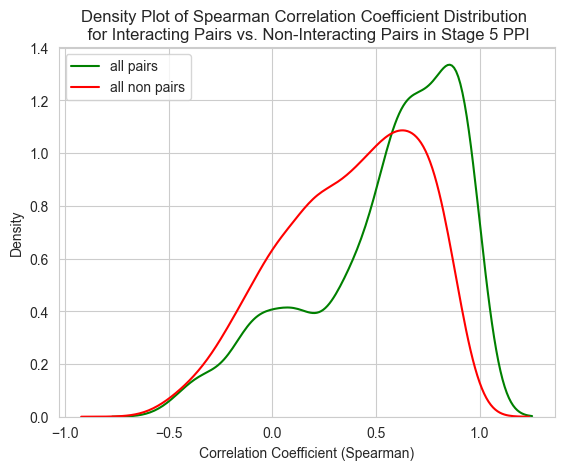

In [52]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Set the plot style
sns.set_style('whitegrid')

# Create the KDE plots
# 7 stages
# sns.kdeplot(np.array(pairs_correlation_df["7_stages"]), bw_method=0.5, color='red', label="7_stages")
# sns.kdeplot(np.array(nonpairs_correlation_df["7_stages"]), bw_method=0.5, color='red', label="nonpairs_7_stages")

# # intraerythrocitic cycle
# sns.kdeplot(np.array(pairs_correlation_df["intraerythrocyte_cycle"]), bw_method=0.5, color='purple', label="intraerythrocyte_cycle")
# sns.kdeplot(np.array(nonpairs_correlation_df["intraerythrocyte_cycle"]), bw_method=0.5, color='purple', label="np_intraerythrocyte_cycle")

# sns.kdeplot(np.array(pairs_correlation_df["spearman_erythrocyte"]), bw_method=0.5, color='blue', label="spearman_erythrocyte")

# sns.kdeplot(np.array(pairs_correlation_df["blood_stages"]), bw_method=0.5, color='green', label="blood_stages")

# All rnaseq data combined
sns.kdeplot(np.array(pairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='green', label="all pairs")
# sns.kdeplot(np.array(nonpairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='orange', label="all non pairs")
sns.kdeplot(np.array(nonpairs_correlation_df["Spearman_all"]), bw_method=0.5, bw_adjust=0.5, color='red', label="all non pairs")
# Set axis labels and plot title
plt.xlabel("Correlation Coefficient (Spearman)")  
plt.ylabel("Density")                 
plt.title("Density Plot of Spearman Correlation Coefficient Distribution \n for Interacting Pairs vs. Non-Interacting Pairs in Stage 5 PPI") 

# Add a legend
plt.legend()
plt.savefig("figures/stage_5_spearman_density")


# Show the plot
plt.show()


In [53]:
# pass in interacting pairs and non-interactings coefficients in kstest, vectors don't have to be same size
spearman_ks = stats.kstest(pairs_correlation_df["Spearman_all"], nonpairs_correlation_df["Spearman_all"])
print("Spearman KS test statistic: \t", spearman_ks[0])
print("Spearman KS test p-value: \t", spearman_ks[1])

Spearman KS test statistic: 	 0.24317254494095059
Spearman KS test p-value: 	 3.9595577850389463e-28


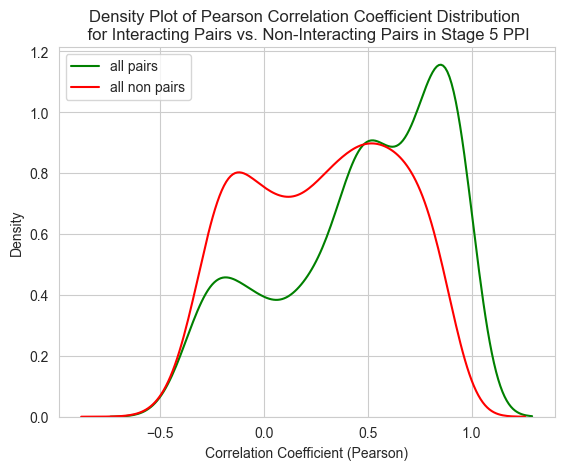

In [54]:
# All rnaseq data combined
sns.kdeplot(np.array(pairs_correlation_df["Pearson_all"]), bw_method=0.5, bw_adjust=0.5, color='green', label="all pairs")
sns.kdeplot(np.array(nonpairs_correlation_df["Pearson_all"]), bw_method=0.5, bw_adjust=0.5, color='red', label="all non pairs")
# Set axis labels and plot title
plt.xlabel("Correlation Coefficient (Pearson)")  
plt.ylabel("Density")                 
plt.title("Density Plot of Pearson Correlation Coefficient Distribution \n for Interacting Pairs vs. Non-Interacting Pairs in Stage 5 PPI") 

# Add a legend
plt.legend()
plt.savefig("figures/stage_5_pearson_density")

# Show the plot
plt.show()

In [55]:
pearson_ks = stats.kstest(pairs_correlation_df["Pearson_all"], nonpairs_correlation_df["Pearson_all"])
print("Pearson statistic: \t", pearson_ks[0])
print("Pearson p-value: \t", pearson_ks[1])

Pearson statistic: 	 0.2327575065695947
Pearson p-value: 	 8.837232127118932e-26


In [56]:
def get_pair_expression_difference(protein1, protein2, rnaseq_data):
    accessions = rnaseq_data["Accession ID"]
    # Get the mean expression level for each protein across all samples
    expression_p1 = rnaseq_data[accessions.isin([protein1])].iloc[0,:-1].mean()
    expression_p2 = rnaseq_data[accessions.isin([protein2])].iloc[0,:-1].mean()
    
    # Return absolute difference in expression means
    return abs(expression_p1 - expression_p2)

# Compute the metric for protein pairs in the network
network_differences = []
for index, row in interaction_pairs.iterrows():
    p1, p2 = row['Protein1'], row['Protein2']
    if p1 in blood_df["Accession ID"].values and p2 in blood_df["Accession ID"].values:
        difference = get_pair_expression_difference(p1, p2, blood_df)
        network_differences.append(difference)

In [57]:
# Perform the Kolmogorov-Smirnov test to check if the distribution follows a normal distribution
ks_stat_norm, p_value_norm = stats.kstest(network_differences, 'norm', args=(np.mean(network_differences), np.std(network_differences)))

# Perform the Kolmogorov-Smirnov test to check if the distribution follows a uniform distribution
ks_stat_uniform, p_value_uniform = stats.kstest(network_differences, 'uniform', args=(min(network_differences), max(network_differences) - min(network_differences)))

# Output the results
print(f"KS Statistic (Normal): {ks_stat_norm}, P-Value (Normal): {p_value_norm}")
print(f"KS Statistic (Uniform): {ks_stat_uniform}, P-Value (Uniform): {p_value_uniform}")

# Interpretation: If p-value is low (e.g., < 0.05), the data does not follow the specified distribution
if p_value_norm < 0.05:
    print("The expression differences do not follow a normal distribution.")
else:
    print("The expression differences follow a normal distribution.")

if p_value_uniform < 0.05:
    print("The expression differences do not follow a uniform distribution.")
else:
    print("The expression differences follow a uniform distribution.")

KS Statistic (Normal): 0.2168633816712356, P-Value (Normal): 1.953464854013172e-23
KS Statistic (Uniform): 0.5033743100267011, P-Value (Uniform): 6.3339496200958e-131
The expression differences do not follow a normal distribution.
The expression differences do not follow a uniform distribution.


In [58]:
blood_df[blood_df["Accession ID"].isin([p1])].iloc[0,:-1].mean()

np.float64(354.4442857142857)

In [59]:
from typing import Set, Dict, List
class Cluster:
    elements: Set[str]
    
    def __init__(self, item):
        self.elements = set()
        if type(item) == str:
            self.elements.add(item)
        elif type(item) == list:
            self.elements.update(item)
        else:
            raise TypeError("Must be a list or string")
      
    def add(self, item: str) -> None:
        self.elements.add(item)
        
    def get_items(self) -> Set[str]:
        return self.elements

    def __str__(self) -> str:
        return str(self.elements)
    
    def __len__(self) -> int:
        return len(self.elements)
    
    def __repr__(self):
        return f"Cluster({self.elements})"
    
    def __getitems__(self):
        return self.elements


class ClusterOrganizer:
    clusters: Dict[int, Cluster]
    
    def __init__(self):
        self.clusters = {}
        
    def add_clusters(self, gene, cluster_nums: List[int]):
        if type(cluster_nums) != list:
            TypeError(f"{gene} has none for cluster_nums")
        for cluster_num in cluster_nums:
            if cluster_num not in self.clusters.keys():
                self.clusters[cluster_num] = Cluster(gene)
            else:
                self.clusters[cluster_num].add(gene)
                

    def get_cluster(self, cluster_num):
        return self.clusters[cluster_num]
    
    def get_all(self):
        return self.clusters
    
    def __in__(self, cluster_num: int):
        return cluster_num in self.clusters.keys()
    
    def __str__(self):
        res = "{\n"
        for k in self.clusters.keys():
            res += f"  {k}: \t{str(self.clusters[k])}\n"
        res += "}"
        return res
    
    def __repr__(self):
        return f"ClusterOrganizer({self.clusters})"
    
    def __getitem__(self, index):
        return self.clusters[index]
    

In [60]:
clusters = ClusterOrganizer()

for i, row in s3_network_df.iterrows():
    p1 = row["Protein1"]
    p2 = row["Protein2"]

    p1_clusters = row["Protein_1_clusters"]
    p2_clusters = row["Protein_2_clusters"]
    
    clusters.add_clusters(p1, p1_clusters)
    clusters.add_clusters(p2, p2_clusters)

In [61]:
for i, row in s3_network_df.iterrows():
    p1 = row["Protein1"]
    p2 = row["Protein2"]

    p1_clusters = row["Protein_1_clusters"]
    p2_clusters = row["Protein_2_clusters"]
    assert type(p2_clusters) != str

In [62]:
# validating cluster data is clean
print("number of na values for protein 1 clusters: ", sum(s3_network_df["Protein_1_clusters"].isna()))
print("number of na values for protein 2 clusters: ", sum(s3_network_df["Protein_2_clusters"].isna()))

number of na values for protein 1 clusters:  0
number of na values for protein 2 clusters:  0


In [63]:
clust = clusters.get_all()

In [64]:
numbers = clust.keys()
proteins = clust.values()
cluster_df = pd.DataFrame({"Number": numbers, 
                           "Proteins": proteins})
print(cluster_df.head())
cluster_df.sort_values(by=["Number"], axis=0, inplace=True)
cluster_df.set_index("Number", drop=False, inplace=True)

   Number                                           Proteins
0       1  {'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...
1       6  {'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...
2       0  {'O97285', 'Q8IIV1', 'Q8IET7', 'Q8I5H4', 'C6KS...
3       2  {'O96252', 'Q8IES0', 'A0A143ZY58', 'C6KTA4', '...
4      18  {'O96252', 'Q8IES0', 'Q8I5H4', 'C6KTA4', 'Q8I0...


In [65]:
clusters

ClusterOrganizer({1: Cluster({'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5K1K7U1', 'Q8IC01', 'Q8IJT1', 'O77396', 'Q8IE84', 'Q8IKJ0', 'Q8I280', 'Q8IDG2', 'Q8IBI3', 'Q6ZMA8', 'Q8IK90', 'Q8IEK1', 'C6KST3', 'Q8I2X4', 'Q8II43', 'Q76NM6', 'Q8IDG3', 'Q8IAR3', 'Q8IJN9', 'Q8I2H3'}), 6: Cluster({'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5K1K7U1', 'Q8IC01', 'Q8IJT1', 'Q8II36', 'O77396', 'Q8IKJ0', 'Q8IDG2', 'Q8IBI3', 'Q6ZMA8', 'O97227', 'C0H5H0', 'Q8IK90', 'Q8IEK1', 'C6KST3', 'Q8I2X4', 'Q8II43', 'Q76NM6', 'Q8IDG3', 'Q8IAR3', 'Q8IJN9'}), 0: Cluster({'O97285', 'Q8IIV1', 'Q8IET7', 'Q8I5H4', 'C6KSV0', 'Q8IKF0', 'K7NTP5', 'Q8IBV7', 'Q8IKG9', 'C6KT18', 'Q8I0V2', 'Q8IK89', 'Q8I0P6', 'Q8IIV2', 'Q8IB24', 'Q8I5L6'}), 2: Cluster({'O96252', 'Q8IES0', 'A0A143ZY58', 'C6KTA4', 'Q8I0V2', 'Q8ILA1', 'Q8IET7', 'Q8IKF0', 'Q76NM3', 'Q8IB03', 'Q8IJW0', 'O97285', 'C6KSX4', 'K7NTP5', 'Q8I1V1', 'Q8IIJ8', 'Q8IFP3', 'Q8I289', 'Q8IIV8', 'Q8IKK7', 'O96153', 'Q8IEC8', 'O97247', 'Q8I0P6', 'Q7KQL5', 'Q8IKR1'}), 18: Cluster({'

In [66]:
cluster_df[cluster_df["Number"] == 5]

,Number,Proteins
Number,,
5,5,"{'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'}"


In [67]:
def cluster_combinations(cluster_df, protein_col, clust_num):
    cluster = cluster_df[cluster_df["Number"] == clust_num][protein_col].values[0].get_items()
    combos = combinations(cluster, 2)
    combos = set(combos)
    combos = pd.DataFrame(combos, columns=["Protein1", "Protein2"])
    return combos

def calculate_avg_spearman(cluster_pair_df, rnaseq_df):
    cluster_pair_df["spearman"] = cluster_pair_df.apply(compute_row_spearman, args=(rnaseq_df,), axis=1)
    return cluster_pair_df["spearman"].mean()

def row_spearman_avg(row):
    row["Proteins"]
    cluster_combinations(row, "Proteins", )

In [68]:
cluster_df

,Number,Proteins
Number,,
0,0,"{'O97285', 'Q8IIV1', 'Q8IET7', 'Q8I5H4', 'C6KS..."
1,1,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5..."
2,2,"{'O96252', 'Q8IES0', 'A0A143ZY58', 'C6KTA4', '..."
3,3,"{'Q76NN6', 'Q8I608', 'Q8I2W3', 'Q8II61', 'Q8I5..."
4,4,"{'A0A144A2H0', 'Q7KQM0', 'Q8IDZ8', 'Q8II24'}"
5,5,"{'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'}"
6,6,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5..."
7,7,"{'Q8IAV1', 'Q8ILZ1', 'Q8IBN4', 'Q8I395', 'Q8I4..."
8,8,"{'C6KT50', 'Q8IJN7', 'Q7KQL9'}"


In [69]:
# testing with one cluster
cluster_0_df = cluster_combinations(cluster_df, "Proteins", 0)
cluster_0_df["spearman"] = cluster_0_df.apply(compute_row_spearman, args=(all_df,), axis=1)
print(cluster_0_df["spearman"].mean())

0.2466666666666666


In [70]:
cluster_df[cluster_df["Number"] == 0]["Proteins"].values[0].get_items()

{'C6KSV0',
 'C6KT18',
 'K7NTP5',
 'O97285',
 'Q8I0P6',
 'Q8I0V2',
 'Q8I5H4',
 'Q8I5L6',
 'Q8IB24',
 'Q8IBV7',
 'Q8IET7',
 'Q8IIV1',
 'Q8IIV2',
 'Q8IK89',
 'Q8IKF0',
 'Q8IKG9'}

In [71]:
cluster_0_df = cluster_df[cluster_df["Number"] == 0]["Proteins"]
combos = combinations(cluster_0_df.values[0].get_items(), 2)
combos = set(combos)
combos = pd.DataFrame(combos, columns=["Protein1", "Protein2"])
# return combos

In [72]:
# calculate average spearman for each
vals = []
for clust_num in list(cluster_df["Number"]):
    tmp = cluster_combinations(cluster_df, "Proteins", clust_num)
    tmp["spearman"] = tmp.apply(compute_row_spearman, args=(all_df,), axis=1)
    x = tmp["spearman"].mean()
    tmp = None
    vals.append(x)
cluster_df["avg_spearman"] = vals

In [73]:
cluster_df

,Number,Proteins,avg_spearman
Number,,,
0,0,"{'O97285', 'Q8IIV1', 'Q8IET7', 'Q8I5H4', 'C6KS...",0.246667
1,1,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...",0.697981
2,2,"{'O96252', 'Q8IES0', 'A0A143ZY58', 'C6KTA4', '...",0.392119
3,3,"{'Q76NN6', 'Q8I608', 'Q8I2W3', 'Q8II61', 'Q8I5...",0.520338
4,4,"{'A0A144A2H0', 'Q7KQM0', 'Q8IDZ8', 'Q8II24'}",0.777833
5,5,"{'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'}",0.835304
6,6,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...",0.702850
7,7,"{'Q8IAV1', 'Q8ILZ1', 'Q8IBN4', 'Q8I395', 'Q8I4...",0.470468
8,8,"{'C6KT50', 'Q8IJN7', 'Q7KQL9'}",0.641215


In [74]:
cluster_df[cluster_df["avg_spearman"] < 0]

,Number,Proteins,avg_spearman
Number,,,


In [75]:
from typing import Iterable
import random
def create_cluster(size: int, proteins: Iterable):
    """Create a cluster from proteins with size. Adds each protein only once

    Args:
        size (int): size of the desired cluster
        proteins (Iterable): iterable proteins to add to cluster
    """
    return random.sample(proteins, size)
    

In [76]:
unique_genes = list(G.nodes)
create_cluster(10, unique_genes)

['Q8I1V1',
 'Q8I5L6',
 'Q8IEU2',
 'O97320',
 'Q8IJN9',
 'C6KSV0',
 'C6KSX4',
 'Q7KQL5',
 'Q8II61',
 'Q8II24']

In [77]:
# want to go through all clusters, 
# make 100 random clusters of that size,
# then do spearman analysis on it,
# calculate avg spearman,
# add to table

cluster_df["size"] = cluster_df["Proteins"].apply(len)

In [78]:
def test_random_cluster():
    return

# pass in cluster_df -> new column with avg spearman of 100 random runs

# pass in (size, set of proteins, number of clusters) -> create number of clusters of size sampling randomly from set of proteins
def sample(sample_size, population, num_samples=100, test_df=all_df) -> float:
    """Runs sample run of spearman correlation coefficients for clusters across num_samples runs 
    on clusters of size sample_size sampled from population.

    Args:
        sample_size (int): size of cluster
        population (Iterable): population to sample from
        num_samples (int): number of samples to do run on (default 100)

    Returns:
        float: average spearman correlation coefficient across all samples
    """
    # create num_samples clusters of size sample_size from population
    sum = 0
    for i in range(num_samples):
        cluster = create_cluster(sample_size, population)
        # print(cluster)
        pairs = combinations(cluster, 2)
        tmp_df = pd.DataFrame(pairs, columns=["Protein1", "Protein2"])
        # print(tmp_df.head())
        tmp_df["spearman"] = tmp_df.apply(compute_row_spearman, args=[test_df], axis=1)
        mean = float(tmp_df["spearman"].mean())
        sum += mean
    return sum/num_samples

In [79]:
sample(6, unique_genes, 100)

0.3956424021422255

In [80]:
"""
['Q8IE67', 'O97306', 'Q8IIF0', 'Q8I5Q3', 'Q8IDN6', 'Q8IJ34']
['Q8II61', 'O96230', 'Q76NM6', 'Q76NM4', 'Q8I261', 'Q8IJ76']
['Q8IJF6', 'C0H551', 'Q8ILZ7', 'Q8IKA6', 'Q8IJN7', 'Q8IKC9']
"""
sum = float(0)
ex_cluster = clusters[1].get_items()
cluster = create_cluster(len(ex_cluster), unique_genes)
print(cluster)
pairs = combinations(cluster, 2)
lst = []
for pair in pairs:
    lst.append(pair)
tmp_df = pd.DataFrame(lst, columns=["Protein1", "Protein2"])
print(tmp_df.head())
tmp_df["spearman"] = tmp_df.apply(compute_row_spearman, args=[all_df], axis=1)
mean = tmp_df["spearman"].mean()
print(mean)
sum += mean

['Q8IEU2', 'Q8I289', 'Q8I5B6', 'O96153', 'Q8IEJ6', 'Q8I280', 'Q8IAV1', 'Q8II24', 'Q8IM01', 'C6KT50', 'Q8I395', 'Q6ZMA8', 'Q8IE84', 'Q8I3N3', 'Q8IIX5', 'Q8IL75', 'Q8III6', 'Q8IJM9', 'Q8ILT0', 'Q8I2V9', 'C6KSV0', 'Q8IC05', 'O97285', 'Q8IBN4']
  Protein1 Protein2
0   Q8IEU2   Q8I289
1   Q8IEU2   Q8I5B6
2   Q8IEU2   O96153
3   Q8IEU2   Q8IEJ6
4   Q8IEU2   Q8I280
0.28161633468979785


In [81]:
cluster_df.sort_values("size", ascending=False)

,Number,Proteins,avg_spearman,size
Number,,,,
2,2,"{'O96252', 'Q8IES0', 'A0A143ZY58', 'C6KTA4', '...",0.392119,26
6,6,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...",0.702850,24
1,1,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...",0.697981,24
18,18,"{'O96252', 'Q8IES0', 'Q8I5H4', 'C6KTA4', 'Q8I0...",0.356469,21
0,0,"{'O97285', 'Q8IIV1', 'Q8IET7', 'Q8I5H4', 'C6KS...",0.246667,16
14,14,"{'Q8IJX3', 'Q8IIV1', 'Q8I5H4', 'C6KSV0', 'K7NT...",0.277058,14
24,24,"{'O96252', 'O97285', 'Q8I5H4', 'Q8IBD1', 'Q8IK...",0.313951,13
7,7,"{'Q8IAV1', 'Q8ILZ1', 'Q8IBN4', 'Q8I395', 'Q8I4...",0.470468,11
20,20,"{'Q76NN6', 'C0H4V6', 'Q8I608', 'Q8I2W3', 'Q8II...",0.474330,10


In [82]:
lst = []
for i in cluster_df["Number"].values:
    lst.append(sample(len(clusters[i]), unique_genes, 100))


In [83]:
cluster_df["avg_spearman_random"] = lst

In [84]:
cluster_df["significant"] = cluster_df["avg_spearman_random"] < cluster_df["avg_spearman"]
cluster_df["large"] = cluster_df["size"] > 2

In [85]:
filtered_cluster_df = cluster_df[cluster_df["avg_spearman_random"] < cluster_df["avg_spearman"]]

In [86]:
len(filtered_cluster_df[filtered_cluster_df["size"] > 2])

19

In [87]:
pairs_correlation_df.sort_values("Spearman_all", ascending=False)

,Protein1,Protein2,spearman_erythrocyte,7_stages,intraerythrocyte_cycle,blood_stages,Spearman_all,Pearson_all
501,Q8I484,Q8ILZ1,1.000000,0.964286,0.976190,0.964286,0.981773,0.925656
267,Q8IIJ8,Q8ILA1,1.000000,0.857143,0.976190,0.964286,0.977833,0.962080
351,Q8I261,Q8IDG2,1.000000,0.857143,0.976190,0.857143,0.974384,0.950694
484,C6KST3,Q8IAR3,1.000000,0.785714,0.976190,0.928571,0.971921,0.955615
103,C6KTB3,Q8I3M5,0.904762,0.964286,0.952381,0.928571,0.971429,0.961641
...,...,...,...,...,...,...,...,...
492,O96252,Q8IKR1,-0.857143,-0.321429,-0.880952,-0.821429,-0.409852,-0.315182
350,K7NTP5,Q8IIV1,-0.833333,-0.678571,-0.904762,-0.321429,-0.416749,-0.378914
192,Q7KQL5,Q8IKR1,-0.880952,-0.321429,-0.833333,-0.892857,-0.431527,-0.397234
407,Q8I0V2,Q8IIJ8,-0.738095,0.035714,-0.666667,-0.785714,-0.480788,-0.387775


In [88]:
cluster_df[cluster_df["Number"] == 5]

,Number,Proteins,avg_spearman,size,avg_spearman_random,significant,large
Number,,,,,,,
5,5,"{'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'}",0.835304,4,0.371945,True,True


In [89]:
filtered_cluster_df.drop("Number", axis=1).sort_values("avg_spearman", ascending=False).head(20)

,Proteins,avg_spearman,size,avg_spearman_random,significant,large
Number,,,,,,
25,"{'Q8I492', 'O96127'}",0.923645,2,0.378098,True,False
19,"{'C6KTB3', 'Q8I3M5', 'O77312'}",0.879310,3,0.366866,True,True
5,"{'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'}",0.835304,4,0.371945,True,True
32,"{'Q7KWJ2', 'A0A143ZX41'}",0.813300,2,0.417662,True,False
26,"{'Q8IIF0', 'A0A5K1K7X4'}",0.805911,2,0.380468,True,False
4,"{'A0A144A2H0', 'Q7KQM0', 'Q8IDZ8', 'Q8II24'}",0.777833,4,0.372795,True,True
23,"{'C0H4D2', 'Q8IM57'}",0.770936,2,0.355639,True,False
12,"{'Q8IEI6', 'Q8IDG9', 'Q8I490'}",0.728736,3,0.398396,True,True
6,"{'Q8I261', 'Q8I0U7', 'Q7K6A9', 'C6KT34', 'A0A5...",0.702850,24,0.381497,True,True


In [90]:
cluster_df.drop("Number", axis=1).to_csv("data/generated_tables/s3_network.tsv", sep="\t")

In [91]:
list(filtered_cluster_df[filtered_cluster_df["Number"] == 5]["Proteins"])

[Cluster({'Q8IDN6', 'Q8IEC8', 'Q8ILV6', 'Q8I2W2'})]

In [92]:
pairs_correlation_df[pairs_correlation_df["Protein1"] == "Q8IE67"]

,Protein1,Protein2,spearman_erythrocyte,7_stages,intraerythrocyte_cycle,blood_stages,Spearman_all,Pearson_all


In [93]:
def find_weakest_pair(cluster_num, cluster_df, pairs_df):
    cluster = list(cluster_df[cluster_df["Number"] == cluster_num]["Proteins"].values[0].get_items())
    weakest = 1
    weakest_pair = None
    for i, row in pairs_df.iterrows():
        if row["Protein1"] in cluster and row["Protein2"] in cluster:
            if row["Spearman_all"] < weakest:
                weakest = row["Spearman_all"]
                weakest_pair = row
    return weakest_pair

In [94]:
find_weakest_pair(5, cluster_df, pairs_correlation_df)

Protein1                    Q8IEC8
Protein2                    Q8ILV6
spearman_erythrocyte     -0.119048
7_stages                  0.714286
intraerythrocyte_cycle   -0.238095
blood_stages              0.857143
Spearman_all              0.732512
Pearson_all               0.677966
Name: 507, dtype: object

In [95]:
s3_network_df[s3_network_df["Protein1"] == "Q8IDG3"]

,index,Protein1,Protein2,Score,Description1,Description2,Protein_1_clusters,Protein_2_clusters,Any Matching Go-Terms?,Train/Val/Test,Experimental P. Falciparum,P. Falciparum,P. Knowlesi,P. Berghei,P. Vivax,P. Yoelii,C. parvum,B. bovis
117,117,Q8IDG3,Q8IJT1,0.780972,Proteasome subunit alpha type,Proteasome subunit beta,"[1, 6]","[1, 6]",1,1,1,1,1,1,1,1,1,1
320,320,Q8IDG3,Q8II43,0.543768,Proteasome subunit alpha type,T-complex protein 1 subunit alpha,"[1, 6]","[1, 6]",0,0,0,0,0,0,0,0,0,0
504,504,Q8IDG3,Q8IJN9,0.669364,Proteasome subunit alpha type,Heat shock protein 60,"[1, 6]","[1, 6, 16]",0,0,0,0,0,0,0,0,0,0
541,541,Q8IDG3,Q8IK90,0.607544,Proteasome subunit alpha type,"Proteasome subunit alpha type-1, putative","[1, 6]","[1, 6]",1,1,1,1,1,1,1,1,1,0


In [96]:
aliases= pd.read_csv("data/GenesByTaxon_Alias.csv")
# merge on common column Gene ID
essentiality_df = essentiality_df.merge(aliases, on="Gene ID")
# take inner join of df and network_df to get aliases only found in network_df
essentiality_df = essentiality_df.merge(network_df["Accession ID"], left_on=["Name/ID/Alias"], right_on=["Accession ID"])
essentiality_df.drop(["Type", "Source", "Name/ID/Alias", "Gene ID", "source_id"], axis=1, inplace=True)

In [97]:
lst = []
for i in cluster_df["Number"]:
    for p in cluster_df[cluster_df["Number"] == i]["Proteins"].values[0].get_items():
        lst.append(p)